**Area of an N Dimensional Sphere**

In [ ]:
import numpy as np
from numpy import random

pi = np.pi
a = 1
N = 30000

x = random.rand(N, 10)*2-1

dist = np.sum(x**2, axis = 1)

interior = np.where(dist<1, 1, 0)

p = np.sum(interior)

area = (p/N)*(2*a)**10
analytical_area = pi**5/120

print(f"Analytical Area: {analytical_area}")
print(f"Numerical area: {area}")


**Area Under a Function Using Monte Carlo**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

np.random.seed(67)

pi = np.pi

def f(x):
    return np.cos(x)

a = 0
b = 3*pi/2
N = 10000
M = 10000
x_arr = np.linspace(a, b, M+1)

y_arr = f(x_arr)
y2 = np.max(y_arr)
y1 = np.min(y_arr)

rect_area = (y2-y1)*(b-a)

x = random.rand(N,)*(b-a)+a
y = random.rand(N,)*(y2-y1)+y1

y_f = f(x)

hits = np.where((y>0)&(y<y_f), 1, np.where((y<0)&(y>y_f), -1, 0))

sum = np.sum(hits)

integral = sum/N*rect_area

print(integral)

-1.0254158358064278


**Casting one distribution on the other**

x: [0, 1] &#8594; y: [a, b]

f(y) is the distribution of y.

The points between x and x+dx get mapped between y and y+dy

Hence,
f(y)dy = dx

$$
\frac{dy}{dx} = \frac{1}{f(y)}
$$

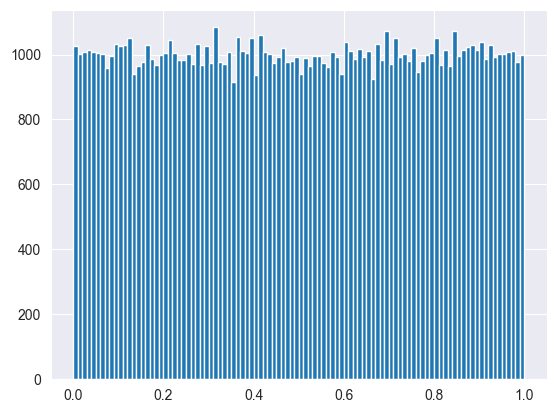

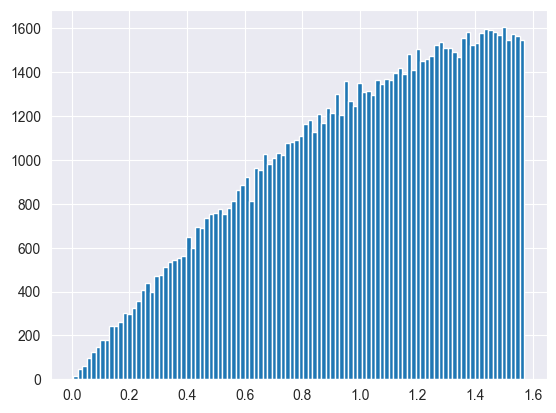

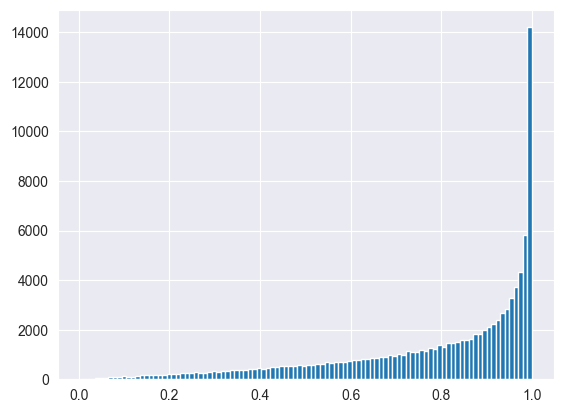

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

N = 100000

x = random.rand(N, )

plt.hist(x, bins=100)
plt.show()

y = np.arccos(1.0 - x)

plt.hist(y, bins=100)
plt.show()

f_y = np.sin(y)

plt.hist(f_y, bins=100)
plt.show()

**BOX MULLER TRANSFORM**

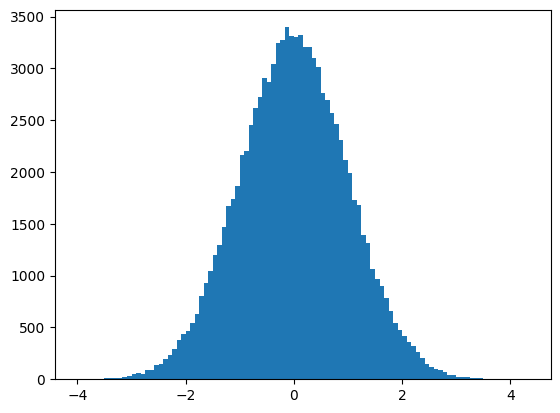

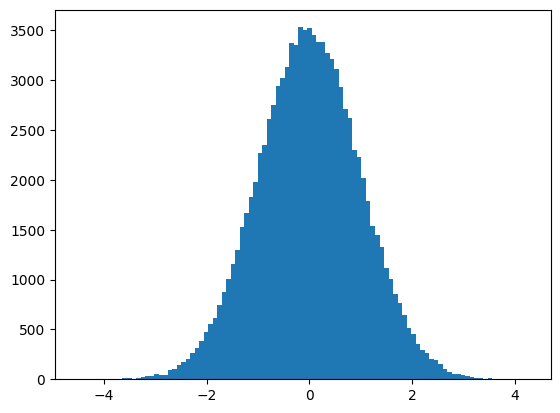

In [47]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

N = 100000
pi = np.pi

def f_r(x):
    return np.sqrt(-2*np.log(x))

def f_theta(x):
    return 2*pi*x

x1 = random.rand(N, )
x2 = random.rand(N, )

r = f_r(x1)
theta = f_theta(x2)

y1 = r*np.cos(theta)
y2 = r*np.sin(theta)

plt.hist(y1, bins = 100)
plt.show()

plt.hist(y2, bins = 100)
plt.show()


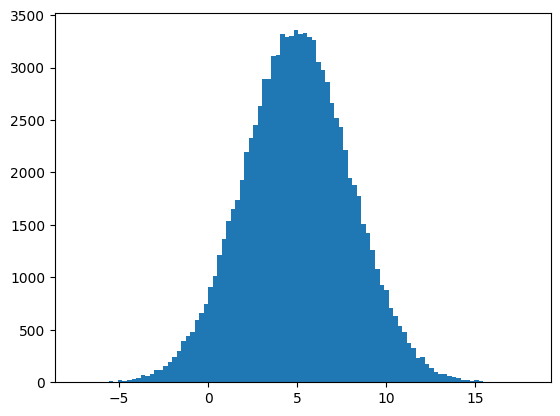

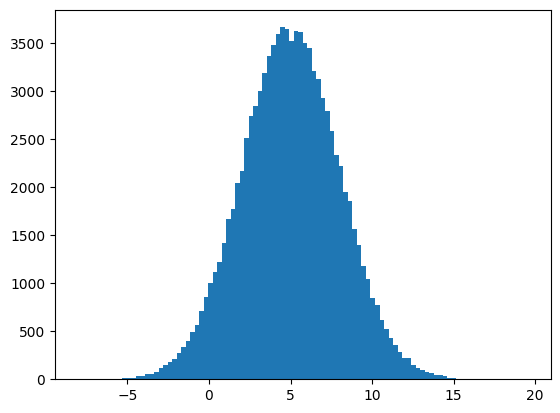

In [8]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

pi = np.pi
mean = 5
sd = 3
N = 100000

x1 = random.rand(N, )
x2 = random.rand(N, )

r = np.sqrt(-2*np.log(x1))
theta = 2*pi*x2

y1 = sd*r*np.cos(theta)+mean
y2 = sd*r*np.sin(theta)+mean

plt.hist(y1, bins = 100, alpha = 1)
plt.show()

plt.hist(y2, bins = 100)
plt.show()

In [21]:
import numpy as np
from numpy import random

pi = np.pi

def f(x):
    return np.sin(x)/(1+x**3)

a = 0
b = 2*pi

# MONTE CARLO
N = 100000
x = random.rand(N, )*(b-a)+a
f_x = f(x)
y2 = np.max(f_x)
y1 = np.min(f_x)
y = random.rand(N,)*(y2-y1)+y1
rect_area = (y2-y1)*(b-a)

hits = np.where((x>0)&(y<f_x), 1, np.where((x<0)&(y>f_x), -1, 0))

sum = np.sum(hits)

area = sum/N*rect_area

#SIMPSON

M = 1000
x2 = np.linspace(a, b, M+1)
f_x2 = f(x2)
dx = x2[1]-x2[0]

vec = [(f_x2[j]+4*f_x2[j+1]+f_x2[j+2])*dx/3 for j in range(0, M-1, 2)]
area_simp = np.sum(vec)

print(f"Area using Simpsons: {area_simp}")
print(f"Area using Monte carlo:{area}")

Area using Simpsons: 0.607666755156605
Area using Monte carlo:0.6796988725687029


Simpson:        0.607666676
MC (mean):      0.602964259
MC (hit-or-miss)0.607610345
